In [1]:
%pip install selenium
%pip install word2number

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from scipy.stats import linregress
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from entity.Book import Book
from word2number import w2n
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

#### on recupere toute les informations sur les url de chaque book avec une pagination automatique

In [3]:
# Créez un objet Options pour personnaliser le navigateur Chrome
options = Options()

# Définissez la taille de la fenêtre du navigateur
options.add_argument("--window-size=1000,600")

# permet d'empecher l'ouverture de la fenetre
options.headless = False

# Définissez le chemin vers le fichier exécutable du driver Chrome
DRIVER_PATH = 'chromedriver'

# Créez une instance du navigateur en utilisant les options personnalisées
driver = webdriver.Chrome(options=options, executable_path=DRIVER_PATH)

# Ouvrez la page web souhaitée
driver.get("https://books.toscrape.com/")


urls = []

def get_url_book():
    booksURL = driver.find_elements(By.CLASS_NAME, 'product_pod')
    for bookURL in booksURL:
        print(bookURL.find_element(By.CSS_SELECTOR, 'a').get_attribute("href"))
        url = bookURL.find_element(By.CSS_SELECTOR, 'a').get_attribute("href")
        urls.append(url)

pagination = True
while pagination == True:

    get_url_book()
    try:
        pagerNext = driver.find_element(By.XPATH, '//*[@class="next"]/a')
        print(pagerNext.get_attribute('href'))
        ## click button
        driver.get(pagerNext.get_attribute('href'))
    except:
        pagination = False
        print("no more page")




books = []
for url in urls:
    driver.get(url)
    titre = driver.find_element(By.XPATH, '//*[@id="content_inner"]/article/div[1]/div[2]/h1').text
    prixstr = driver.find_element(By.XPATH, '//*[@id="content_inner"]/article/div[1]/div[2]/p[1]').text
    prix = float(prixstr[1:])
    rating_class_str = driver.find_element(By.CLASS_NAME, 'star-rating').get_attribute("class")
    words = rating_class_str.split()
    rating = w2n.word_to_num(words[-1].lower())
    if "In stock" in driver.find_element(By.XPATH, '//*[@id="content_inner"]/article/div[1]/div[2]/p[2]').text:
        disponibility = True
    else:
        disponibility = False
    img = driver.find_element(By.XPATH, '//*[@id="product_gallery"]/div/div/div/img').get_attribute("src")
    book = Book(titre, prix, rating, disponibility, img)
    books.append(book)
    print(book.__str__())

# Fermez le navigateur
driver.quit()

https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
https://books.toscrape.com/catalogue/soumission_998/index.html
https://books.toscrape.com/catalogue/sharp-objects_997/index.html
https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html
https://books.toscrape.com/catalogue/the-requiem-red_995/index.html
https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
https://books.toscrape.com/catalogue/the-black-maria_991/index.html
https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html
https://books.toscr

https://books.toscrape.com/catalogue/my-paris-kitchen-recipes-and-stories_910/index.html
https://books.toscrape.com/catalogue/masks-and-shadows_909/index.html
https://books.toscrape.com/catalogue/mama-tried-traditional-italian-cooking-for-the-screwed-crude-vegan-and-tattooed_908/index.html
https://books.toscrape.com/catalogue/lumberjanes-vol-2-friendship-to-the-max-lumberjanes-5-8_907/index.html
https://books.toscrape.com/catalogue/lumberjanes-vol-1-beware-the-kitten-holy-lumberjanes-1-4_906/index.html
https://books.toscrape.com/catalogue/lumberjanes-vol-3-a-terrible-plan-lumberjanes-9-12_905/index.html
https://books.toscrape.com/catalogue/layered-baking-building-and-styling-spectacular-cakes_904/index.html
https://books.toscrape.com/catalogue/judo-seven-steps-to-black-belt-an-introductory-guide-for-beginners_903/index.html
https://books.toscrape.com/catalogue/join_902/index.html
https://books.toscrape.com/catalogue/in-the-country-we-love-my-family-divided_901/index.html
https://books.

https://books.toscrape.com/catalogue/mrs-houdini_821/index.html
https://books.toscrape.com/catalogue/page-10.html
https://books.toscrape.com/catalogue/modern-romance_820/index.html
https://books.toscrape.com/catalogue/miss-peregrines-home-for-peculiar-children-miss-peregrines-peculiar-children-1_819/index.html
https://books.toscrape.com/catalogue/louisa-the-extraordinary-life-of-mrs-adams_818/index.html
https://books.toscrape.com/catalogue/little-red_817/index.html
https://books.toscrape.com/catalogue/library-of-souls-miss-peregrines-peculiar-children-3_816/index.html
https://books.toscrape.com/catalogue/large-print-heart-of-the-pride_815/index.html
https://books.toscrape.com/catalogue/i-had-a-nice-time-and-other-lies-how-to-find-love-sht-like-that_814/index.html
https://books.toscrape.com/catalogue/hollow-city-miss-peregrines-peculiar-children-2_813/index.html
https://books.toscrape.com/catalogue/grumbles_812/index.html
https://books.toscrape.com/catalogue/full-moon-over-noahs-ark-an-

https://books.toscrape.com/catalogue/once-was-a-time_724/index.html
https://books.toscrape.com/catalogue/old-school-diary-of-a-wimpy-kid-10_723/index.html
https://books.toscrape.com/catalogue/no-dream-is-too-high-life-lessons-from-a-man-who-walked-on-the-moon_722/index.html
https://books.toscrape.com/catalogue/naruto-3-in-1-edition-vol-14-includes-vols-40-41-42-naruto-omnibus-14_721/index.html
https://books.toscrape.com/catalogue/page-15.html
https://books.toscrape.com/catalogue/my-name-is-lucy-barton_720/index.html
https://books.toscrape.com/catalogue/my-mrs-brown_719/index.html
https://books.toscrape.com/catalogue/my-kind-of-crazy_718/index.html
https://books.toscrape.com/catalogue/mr-mercedes-bill-hodges-trilogy-1_717/index.html
https://books.toscrape.com/catalogue/more-than-music-chasing-the-dream-1_716/index.html
https://books.toscrape.com/catalogue/made-to-stick-why-some-ideas-survive-and-others-die_715/index.html
https://books.toscrape.com/catalogue/luis-paints-the-world_714/ind

https://books.toscrape.com/catalogue/the-children_633/index.html
https://books.toscrape.com/catalogue/stars-above-the-lunar-chronicles-45_632/index.html
https://books.toscrape.com/catalogue/snatched-how-a-drug-queen-went-undercover-for-the-dea-and-was-kidnapped-by-colombian-guerillas_631/index.html
https://books.toscrape.com/catalogue/raspberry-pi-electronics-projects-for-the-evil-genius_630/index.html
https://books.toscrape.com/catalogue/quench-your-own-thirst-business-lessons-learned-over-a-beer-or-two_629/index.html
https://books.toscrape.com/catalogue/psycho-sanitarium-psycho-15_628/index.html
https://books.toscrape.com/catalogue/poisonous-max-revere-novels-3_627/index.html
https://books.toscrape.com/catalogue/one-with-you-crossfire-5_626/index.html
https://books.toscrape.com/catalogue/no-love-allowed-dodge-cove-1_625/index.html
https://books.toscrape.com/catalogue/murder-at-the-42nd-street-library-raymond-ambler-1_624/index.html
https://books.toscrape.com/catalogue/most-wanted_623

https://books.toscrape.com/catalogue/page-24.html
https://books.toscrape.com/catalogue/roller-girl_540/index.html
https://books.toscrape.com/catalogue/rising-strong_539/index.html
https://books.toscrape.com/catalogue/proofs-of-god-classical-arguments-from-tertullian-to-barth_538/index.html
https://books.toscrape.com/catalogue/please-kill-me-the-uncensored-oral-history-of-punk_537/index.html
https://books.toscrape.com/catalogue/out-of-print-city-lights-spotlight-no-14_536/index.html
https://books.toscrape.com/catalogue/my-life-next-door-my-life-next-door_535/index.html
https://books.toscrape.com/catalogue/millers-valley_534/index.html
https://books.toscrape.com/catalogue/mans-search-for-meaning_533/index.html
https://books.toscrape.com/catalogue/love-that-boy-what-two-presidents-eight-road-trips-and-my-son-taught-me-about-a-parents-expectations_532/index.html
https://books.toscrape.com/catalogue/living-forward-a-proven-plan-to-stop-drifting-and-get-the-life-you-want_531/index.html
https

https://books.toscrape.com/catalogue/the-perks-of-being-a-wallflower_453/index.html
https://books.toscrape.com/catalogue/the-mysterious-affair-at-styles-hercule-poirot-1_452/index.html
https://books.toscrape.com/catalogue/the-man-who-mistook-his-wife-for-a-hat-and-other-clinical-tales_451/index.html
https://books.toscrape.com/catalogue/the-makings-of-a-fatherless-child_450/index.html
https://books.toscrape.com/catalogue/the-joy-of-cooking_449/index.html
https://books.toscrape.com/catalogue/the-invention-of-wings_448/index.html
https://books.toscrape.com/catalogue/the-hobbit-middle-earth-universe_447/index.html
https://books.toscrape.com/catalogue/the-great-railway-bazaar_446/index.html
https://books.toscrape.com/catalogue/the-golden-compass-his-dark-materials-1_445/index.html
https://books.toscrape.com/catalogue/the-god-delusion_444/index.html
https://books.toscrape.com/catalogue/the-girl-you-left-behind-the-girl-you-left-behind-1_443/index.html
https://books.toscrape.com/catalogue/the

https://books.toscrape.com/catalogue/alight-the-generations-trilogy-2_360/index.html
https://books.toscrape.com/catalogue/a-girls-guide-to-moving-on-new-beginnings-2_359/index.html
https://books.toscrape.com/catalogue/a-game-of-thrones-a-song-of-ice-and-fire-1_358/index.html
https://books.toscrape.com/catalogue/a-feast-for-crows-a-song-of-ice-and-fire-4_357/index.html
https://books.toscrape.com/catalogue/a-clash-of-kings-a-song-of-ice-and-fire-2_356/index.html
https://books.toscrape.com/catalogue/vogue-colors-a-to-z-a-fashion-coloring-book_355/index.html
https://books.toscrape.com/catalogue/the-shining-the-shining-1_354/index.html
https://books.toscrape.com/catalogue/the-pilgrims-progress_353/index.html
https://books.toscrape.com/catalogue/the-perfect-play-play-by-play-1_352/index.html
https://books.toscrape.com/catalogue/the-passion-of-dolssa_351/index.html
https://books.toscrape.com/catalogue/the-jazz-of-physics-the-secret-link-between-music-and-the-structure-of-the-universe_350/inde

https://books.toscrape.com/catalogue/the-purpose-driven-life-what-on-earth-am-i-here-for_272/index.html
https://books.toscrape.com/catalogue/the-purest-hook-second-circle-tattoos-3_271/index.html
https://books.toscrape.com/catalogue/the-picture-of-dorian-gray_270/index.html
https://books.toscrape.com/catalogue/the-paris-wife_269/index.html
https://books.toscrape.com/catalogue/the-obsession_268/index.html
https://books.toscrape.com/catalogue/the-nightingale_267/index.html
https://books.toscrape.com/catalogue/the-new-guy-and-other-senior-year-distractions_266/index.html
https://books.toscrape.com/catalogue/the-nanny-diaries-nanny-1_265/index.html
https://books.toscrape.com/catalogue/the-name-of-god-is-mercy_264/index.html
https://books.toscrape.com/catalogue/the-maze-runner-the-maze-runner-1_263/index.html
https://books.toscrape.com/catalogue/the-lovers-dictionary_262/index.html
https://books.toscrape.com/catalogue/the-lonely-ones_261/index.html
https://books.toscrape.com/catalogue/page-

https://books.toscrape.com/catalogue/jurassic-park-jurassic-park-1_180/index.html
https://books.toscrape.com/catalogue/its-never-too-late-to-begin-again-discovering-creativity-and-meaning-at-midlife-and-beyond_179/index.html
https://books.toscrape.com/catalogue/is-everyone-hanging-out-without-me-and-other-concerns_178/index.html
https://books.toscrape.com/catalogue/into-the-wild_177/index.html
https://books.toscrape.com/catalogue/inferno-robert-langdon-4_176/index.html
https://books.toscrape.com/catalogue/in-the-garden-of-beasts-love-terror-and-an-american-family-in-hitlers-berlin_175/index.html
https://books.toscrape.com/catalogue/if-i-run-if-i-run-1_174/index.html
https://books.toscrape.com/catalogue/ive-got-your-number_173/index.html
https://books.toscrape.com/catalogue/i-am-malala-the-girl-who-stood-up-for-education-and-was-shot-by-the-taliban_172/index.html
https://books.toscrape.com/catalogue/hungry-girl-clean-hungry-easy-all-natural-recipes-for-healthy-eating-in-the-real-world_1

https://books.toscrape.com/catalogue/the-story-of-hong-gildong_84/index.html
https://books.toscrape.com/catalogue/the-silent-wife_83/index.html
https://books.toscrape.com/catalogue/the-silent-twin-detective-jennifer-knight-3_82/index.html
https://books.toscrape.com/catalogue/the-selfish-gene_81/index.html
https://books.toscrape.com/catalogue/page-47.html
https://books.toscrape.com/catalogue/the-secret-healer_80/index.html
https://books.toscrape.com/catalogue/the-sandman-vol-1-preludes-and-nocturnes-the-sandman-volumes-1_79/index.html
https://books.toscrape.com/catalogue/the-republic_78/index.html
https://books.toscrape.com/catalogue/the-odyssey_77/index.html
https://books.toscrape.com/catalogue/the-no-1-ladies-detective-agency-no-1-ladies-detective-agency-1_76/index.html
https://books.toscrape.com/catalogue/the-nicomachean-ethics_75/index.html
https://books.toscrape.com/catalogue/the-name-of-the-wind-the-kingkiller-chronicle-1_74/index.html
https://books.toscrape.com/catalogue/the-mirr


        title : The Dirty Little Secrets of Getting Your Dream Job

        prix : 33.34

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/e1/1b/e11bea016d0ae1d7e2dd46fb3cb870b7.jpg
                
        

        title : The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull

        prix : 17.93

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/97/36/9736132a43b8e6e3989932218ef309ed.jpg
                
        

        title : The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics

        prix : 22.6

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/d1/2d/d12d26739b5369a6b5b3024e4d08f907.jpg
                
        

        title : The Black Maria

        prix : 52.15

        note : 1

        disponibility : True

        image : https://boo


        title : You can't bury them all: Poems

        prix : 33.63

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/b7/44/b7440aa88046b0bf8cba50d59295518e.jpg
                
        

        title : Slow States of Collapse: Poems

        prix : 57.31

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/db/ac/dbac3faca8a799824f5725d66c0fcce3.jpg
                
        

        title : Reasons to Stay Alive

        prix : 26.41

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/f5/3c/f53c7d21723c860cfbca2b539bc55b8f.jpg
                
        

        title : Private Paris (Private #10)

        prix : 47.61

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/05/87/0587ab519222a61f803fa4570c325ad2.jpg
                
        

        title : #HigherSelfie: Wake Up 


        title : The Art Forger

        prix : 40.76

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/f5/3b/f53bc7b18914c97de7c23967293be119.jpg
                
        

        title : The Age of Genius: The Seventeenth Century and the Birth of the Modern Mind

        prix : 19.73

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/2e/65/2e654066306042f4c462ba4d048650d9.jpg
                
        

        title : The Activist's Tao Te Ching: Ancient Advice for a Modern Revolution

        prix : 32.24

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/da/0c/da0ca35421a5120b2109028e44a53f56.jpg
                
        

        title : Spark Joy: An Illustrated Master Class on the Art of Organizing and Tidying Up

        prix : 41.83

        note : 4

        disponibility : True

        image : https://books.toscrape


        title : I am a Hero Omnibus Volume 1

        prix : 54.63

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/f7/4d/f74db5141becf01083abc03c078f4922.jpg
                
        

        title : How to Be Miserable: 40 Strategies You Already Use

        prix : 46.03

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/b0/9d/b09d7cb6aa8ae112dd457e588762d293.jpg
                
        

        title : Her Backup Boyfriend (The Sorensen Family #1)

        prix : 33.97

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/41/ee/41ee38c1d15f0139a3fb17b730dc4347.jpg
                
        

        title : Giant Days, Vol. 2 (Giant Days #5-8)

        prix : 22.11

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/d0/6f/d06ff4e3b9daf93b18bb21f1af19b5eb.jpg
               


        title : Thirteen Reasons Why

        prix : 52.72

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/6d/7b/6d7b69b4edcdf5b6b075d6fa53bf74bc.jpg
                
        

        title : The White Cat and the Monk: A Retelling of the Poem “Pangur Bán”

        prix : 58.08

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/49/0e/490e049133ee9f398e6a70f25c12e308.jpg
                
        

        title : The Wedding Dress

        prix : 24.12

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/29/3b/293bd9cd6fe1f8c82d1688aefe6cc5f7.jpg
                
        

        title : The Vacationers

        prix : 42.15

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/34/c9/34c988a76c3cd7c04566d3030d8e7331.jpg
                
        

        title : The Third Wave:


        title : Soft Apocalypse

        prix : 26.12

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/61/ca/61ca5ab6bc514b9527af9f805fa03c31.jpg
                
        

        title : So You've Been Publicly Shamed

        prix : 12.23

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/9d/15/9d150a1d5832bb9e3b82bbc1541912d6.jpg
                
        

        title : Shoe Dog: A Memoir by the Creator of NIKE

        prix : 23.99

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/fc/21/fc21d144c7289e5b1cb133e01a925126.jpg
                
        

        title : Shobu Samurai, Project Aryoku (#3)

        prix : 29.06

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/f3/7f/f37f3173a97baeac6b6421c54a6df7b5.jpg
                
        

        title : Secrets and


        title : Dark Notes

        prix : 19.19

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/1c/88/1c8807c42be085f3b061fe63f62a3c39.jpg
                
        

        title : Daring Greatly: How the Courage to Be Vulnerable Transforms the Way We Live, Love, Parent, and Lead

        prix : 19.43

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/38/ea/38ea04e1e16ebef78fd2595771fe2287.jpg
                
        

        title : Close to You

        prix : 49.46

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/94/f4/94f4405dae04559ecdd92e62486623e3.jpg
                
        

        title : Chasing Heaven: What Dying Taught Me About Living

        prix : 37.8

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/87/cd/87cd2aa5c4e38244ffcb17b84b0f6efd.jpg
     


        title : The Wedding Pact (The O'Malleys #2)

        prix : 32.61

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/21/53/21539e305aa09ec40b36daa43db3f2fe.jpg
                
        

        title : The Time Keeper

        prix : 27.88

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/37/d1/37d108ff5b19028a52ddd73dba35d543.jpg
                
        

        title : The Testament of Mary

        prix : 52.67

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/06/a6/06a62270c0700ae3c537cf394cf145ee.jpg
                
        

        title : The Star-Touched Queen

        prix : 46.02

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/ac/1a/ac1a0546d9cdf6cd82ab7712a6c418df.jpg
                
        

        title : The Songs of the Gods

        prix : 


        title : So Cute It Hurts!!, Vol. 6 (So Cute It Hurts!! #6)

        prix : 35.43

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/53/ea/53ead08572cc44510da38edf559722d1.jpg
                
        

        title : Shtum

        prix : 55.84

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/63/62/63623a0b014b1f26e49aa61786e6e708.jpg
                
        

        title : See America: A Celebration of Our National Parks & Treasured Sites

        prix : 48.87

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/c7/1a/c71a85dbf8c2dbc75cb271026618477c.jpg
                
        

        title : salt.

        prix : 46.78

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/c9/92/c9924f9637aef6d9fc8e165be62f69ee.jpg
                
        

        title : Robin


        title : Hush, Hush (Hush, Hush #1)

        prix : 47.02

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/0d/e9/0de97404e7bbd00d7aa6cd429b0de1da.jpg
                
        

        title : Hold Your Breath (Search and Rescue #1)

        prix : 28.82

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/3d/4d/3d4d8e92429144f6c807adc4b15b7f80.jpg
                
        

        title : Hamilton: The Revolution

        prix : 58.79

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/03/1f/031f508a4a8ef70743ea7e9d4f598d38.jpg
                
        

        title : Greek Mythic History

        prix : 10.23

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/b0/45/b04568c8b10a2aef00eaecafefac7ee0.jpg
                
        

        title : God: The Most Unpleasa


        title : Batman: Europa

        prix : 32.01

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/dc/f7/dcf7314eb8526366ae9179d1f94bc78e.jpg
                
        

        title : Barefoot Contessa Back to Basics

        prix : 28.01

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/29/b1/29b1f537504f37527f1bf8182559684e.jpg
                
        

        title : Barefoot Contessa at Home: Everyday Recipes You'll Make Over and Over Again

        prix : 50.62

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/4e/92/4e92fef6b2d96fb732480c484dcb1a98.jpg
                
        

        title : Balloon Animals

        prix : 17.03

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/f3/fc/f3fc38185b3b6ede38fd9dea2590c01f.jpg
                
        

        tit


        title : The Dinner Party

        prix : 56.54

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/a5/ad/a5ad88ff798c629eb24b19188c1ea902.jpg
                
        

        title : The Diary of a Young Girl

        prix : 59.9

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/eb/26/eb2622ca0a304963d3bac0efa1bad775.jpg
                
        

        title : The Children

        prix : 11.88

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/b3/0b/b30bf2a60739293261c9a997c7ae2ef6.jpg
                
        

        title : Stars Above (The Lunar Chronicles #4.5)

        prix : 48.05

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/8f/22/8f221677f6d28eba048ebb505fcfd90a.jpg
                
        

        title : Snatched: How A Drug Queen Went Undercov


        title : Playing with Fire

        prix : 13.71

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/09/02/0902666ade8ab8183363e53c108e5069.jpg
                
        

        title : Off the Hook (Fishing for Trouble #1)

        prix : 47.67

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/bc/21/bc214639946c501cd70ff6b752439c76.jpg
                
        

        title : Mothering Sunday

        prix : 13.34

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/9b/1a/9b1a03d05c16c71050daefad8840ec91.jpg
                
        

        title : Mother, Can You Not?

        prix : 16.89

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/88/b4/88b464746c5882cc605827a0521ddcea.jpg
                
        

        title : M Train

        prix : 27.18

        no


        title : Suzie Snowflake: One beautiful flake (a self-esteem story)

        prix : 54.81

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/59/13/5913f74507084d0cd47e2b73fd806f9e.jpg
                
        

        title : Nap-a-Roo

        prix : 25.08

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/b9/43/b9437eda691f483d2174a1b94c8c9d06.jpg
                
        

        title : NaNo What Now? Finding your editing process, revising your NaNoWriMo book and building a writing career through publishing and beyond

        prix : 10.41

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/61/7b/617bd5deaa5ea47ae717cb81c9a81ce8.jpg
                
        

        title : Modern Day Fables

        prix : 47.44

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/


        title : Out of Print: City Lights Spotlight No. 14

        prix : 53.64

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/4c/5a/4c5a559bc2edb79e5d48af4dbc813eb2.jpg
                
        

        title : My Life Next Door (My Life Next Door )

        prix : 36.39

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/1a/2c/1a2c80cc391bc1422013e31682c5f649.jpg
                
        

        title : Miller's Valley

        prix : 58.54

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/a8/b9/a8b940d9bf27d6aedad73f0230c14f56.jpg
                
        

        title : Man's Search for Meaning

        prix : 29.48

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/97/da/97dac3668fcca2cf5af4e1bb971af546.jpg
                
        

        title : Love That Bo


        title : Under the Tuscan Sun

        prix : 37.33

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/45/21/4521c581ba727f5c835e34860cbf53e5.jpg
                
        

        title : Toddlers Are A**holes: It's Not Your Fault

        prix : 25.55

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/26/1a/261a092ddd76981beb23a601edf0868b.jpg
                
        

        title : The Year of Living Biblically: One Man's Humble Quest to Follow the Bible as Literally as Possible

        prix : 34.72

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/e3/b8/e3b8b5a65135abbd9bdbd7a98baa1077.jpg
                
        

        title : The Whale

        prix : 35.96

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/6c/df/6cdf7a3ee6cfd5ecbcfd37bd7a5c42e3.jpg
     


        title : How to Be a Domestic Goddess: Baking and the Art of Comfort Cooking

        prix : 28.25

        note : 2

        disponibility : True

        image : https://books.toscrape.com/media/cache/3b/67/3b673813904dce654eee394b9d308cfc.jpg
                
        

        title : Good in Bed (Cannie Shapiro #1)

        prix : 37.05

        note : 5

        disponibility : True

        image : https://books.toscrape.com/media/cache/a5/7a/a57a35a22d7a06fa9987121e4883e4de.jpg
                
        

        title : Fruits Basket, Vol. 7 (Fruits Basket #7)

        prix : 19.57

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/c3/36/c3366ab246bf5e4baec15cdf55915b69.jpg
                
        

        title : For the Love: Fighting for Grace in a World of Impossible Standards

        prix : 45.13

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/a9/f4/a9f4d0


        title : Ship Leaves Harbor: Essays on Travel by a Recovering Journeyman

        prix : 30.6

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/1e/d2/1ed2c2f8f406ed7ed90a58f73d4f1058.jpg
                
        

        title : Pride and Prejudice

        prix : 19.27

        note : 4

        disponibility : True

        image : https://books.toscrape.com/media/cache/6a/87/6a8706826789aa47fbbb8a2459b4c616.jpg
                
        

        title : Musicophilia: Tales of Music and the Brain

        prix : 46.58

        note : 1

        disponibility : True

        image : https://books.toscrape.com/media/cache/ef/e7/efe7be2e15323d5bee36c37e953b1cad.jpg
                
        

        title : Mere Christianity

        prix : 48.51

        note : 3

        disponibility : True

        image : https://books.toscrape.com/media/cache/d7/ce/d7ce17649c77c9addfcf265012d0436e.jpg
                
        

       

WebDriverException: Message: disconnected: Unable to receive message from renderer
  (failed to check if window was closed: timeout: Timed out receiving message from renderer: 600.000)
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x00F0F243]
	(No symbol) [0x00E97FD1]
	(No symbol) [0x00D8D04D]
	(No symbol) [0x00D7FC86]
	(No symbol) [0x00D7FA5C]
	(No symbol) [0x00D7E7E8]
	(No symbol) [0x00D7EEF7]
	(No symbol) [0x00D95F54]
	(No symbol) [0x00D8F82B]
	(No symbol) [0x00D8F350]
	(No symbol) [0x00D8FBA2]
	(No symbol) [0x00D8FE80]
	(No symbol) [0x00DB7D27]
	(No symbol) [0x00DD858C]
	(No symbol) [0x00DB2BFF]
	(No symbol) [0x00DD8804]
	(No symbol) [0x00DEC9EB]
	(No symbol) [0x00DD8386]
	(No symbol) [0x00DB163C]
	(No symbol) [0x00DB269D]
	GetHandleVerifier [0x011A9A22+2655074]
	GetHandleVerifier [0x0119CA24+2601828]
	GetHandleVerifier [0x00FB8C0A+619850]
	GetHandleVerifier [0x00FB7830+614768]
	(No symbol) [0x00EA05FC]
	(No symbol) [0x00EA5968]
	(No symbol) [0x00EA5A55]
	(No symbol) [0x00EB051B]
	BaseThreadInitThunk [0x76CA6BD9+25]
	RtlGetFullPathName_UEx [0x77768FD2+1218]
	RtlGetFullPathName_UEx [0x77768F9D+1165]


#### on transforme les books en dataframe et les enregistre en csv pour ensuite les convertir en .bd

In [4]:
csv_books = pd.DataFrame([vars(book) for book in books])

csv_books.to_csv("books_csv.csv")


df = pd.read_csv('books_csv.csv')

conn = sqlite3.connect('database.db')

df.to_sql('book', conn, if_exists='replace')

conn.close()

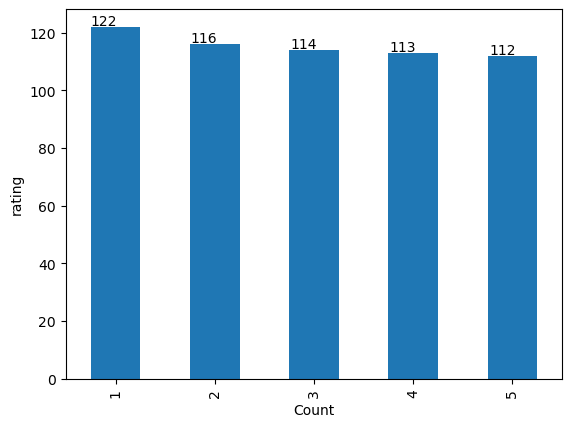

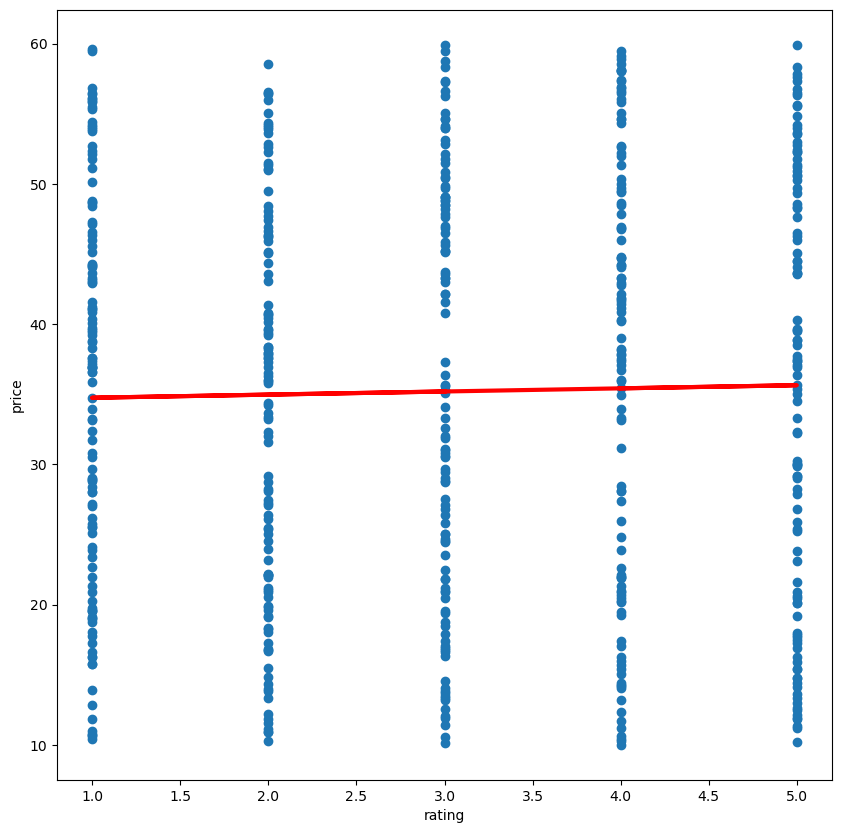

In [5]:
df = pd.read_csv("books_csv.csv")

ax = df.rating.value_counts().plot(kind="bar")

plt.xlabel("Count")
plt.ylabel("rating")

#Add the counts on top the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


dataframe = pd.read_csv("books_csv.csv")


# Change the default figure size

y = dataframe.prix
x = dataframe.rating

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y )
plt.xlabel("rating")
plt.ylabel("price")

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

plt.show()

#### on peut voir que le prix n'as pas vraiment d'influence sur la note et on peu egalement constater que les notes sont tres varier mais plutot egale au final